In [196]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [197]:
data=pd.read_csv("S&P.csv")
data.head(5)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,1-May-24,"5,029.03","5,096.12","5,013.45","5,018.39","5,018.39","4,544,170,000"
1,30-Apr-24,"5,103.78","5,110.83","5,035.31","5,035.69","5,035.69","4,082,470,000"
2,29-Apr-24,"5,114.13","5,123.49","5,088.65","5,116.17","5,116.17","3,447,450,000"
3,26-Apr-24,"5,084.65","5,114.62","5,073.14","5,099.96","5,099.96","3,604,140,000"
4,25-Apr-24,"5,019.88","5,057.75","4,990.58","5,048.42","5,048.42","3,958,050,000"


PreProcessing

In [198]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64


In [199]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
            Date      Open      High       Low    Close* Adj Close**  \
count       3606      3606      3606      3606      3606        3606   
unique      3606      3581      3575      3586      3588        3588   
top     1-May-24  2,038.20  2,674.35  2,041.88  2,066.66    2,066.66   
freq           1         2         2         3         2           2   

               Volume  
count            3606  
unique           3550  
top     4,223,740,000  
freq               12  


In [200]:
# Check data types and missing values
print("\nData types and missing values:")
print(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606 entries, 0 to 3605
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3606 non-null   object
 1   Open         3606 non-null   object
 2   High         3606 non-null   object
 3   Low          3606 non-null   object
 4   Close*       3606 non-null   object
 5   Adj Close**  3606 non-null   object
 6   Volume       3606 non-null   object
dtypes: object(7)
memory usage: 197.3+ KB
None


In [201]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Replace month names with month numbers
data['Date'] = data['Date'].dt.strftime('%d-%m-%y')

data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1720\340290758.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,01-05-24,"5,029.03","5,096.12","5,013.45","5,018.39","5,018.39","4,544,170,000"
1,30-04-24,"5,103.78","5,110.83","5,035.31","5,035.69","5,035.69","4,082,470,000"
2,29-04-24,"5,114.13","5,123.49","5,088.65","5,116.17","5,116.17","3,447,450,000"
3,26-04-24,"5,084.65","5,114.62","5,073.14","5,099.96","5,099.96","3,604,140,000"
4,25-04-24,"5,019.88","5,057.75","4,990.58","5,048.42","5,048.42","3,958,050,000"


In [202]:
numerical_columns = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
data[numerical_columns] = data[numerical_columns].replace(',', '', regex=True)

# Convert numerical columns to float
data[numerical_columns] = data[numerical_columns].astype(float)

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize selected columns
data[numerical_columns] = min_max_scaler.fit_transform(data[numerical_columns])

# Display the normalized DataFrame
print(data)

          Date      Open      High       Low    Close*  Adj Close**    Volume
0     01-05-24  0.945881  0.960129  0.945130  0.944241     0.944241  0.366855
1     30-04-24  0.963551  0.963605  0.950292  0.948329     0.948329  0.318725
2     29-04-24  0.965998  0.966597  0.962887  0.967347     0.967347  0.252528
3     26-04-24  0.959029  0.964501  0.959225  0.963516     0.963516  0.268862
4     25-04-24  0.943718  0.951062  0.939730  0.951337     0.951337  0.305755
...        ...       ...       ...       ...       ...          ...       ...
3601  08-01-10  0.026681  0.026570  0.029590  0.028924     0.028924  0.350741
3602  07-01-10  0.025677  0.025877  0.028433  0.028147     0.028147  0.442590
3603  06-01-10  0.025544  0.025105  0.029054  0.027071     0.027071  0.411523
3604  05-01-10  0.024823  0.024500  0.028041  0.026925     0.026925  0.152825
3605  04-01-10  0.021017  0.023847  0.024947  0.026091     0.026091  0.309232

[3606 rows x 7 columns]


In [203]:
# Select numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Perform the Augmented Dickey-Fuller test for each numerical column
for column in numerical_columns:
    # Perform the ADF test
    adf_result = adfuller(data[column])
    
    # Extracting test statistics and p-value
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    
    # Print the results
    print(f'Column: {column}')
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    
    # Interpret the results
    if p_value < 0.05:
        print("Reject the null hypothesis (H0): The data is stationary.")
    else:
        print("Fail to reject the null hypothesis (H0): The data is non-stationary.")
    print()

Column: Open
ADF Statistic: -1.8430410622473914
p-value: 0.35931191334058143
Fail to reject the null hypothesis (H0): The data is non-stationary.

Column: High
ADF Statistic: -2.1777066486474976
p-value: 0.2144359117945226
Fail to reject the null hypothesis (H0): The data is non-stationary.

Column: Low
ADF Statistic: -2.142191285196262
p-value: 0.22789101740960493
Fail to reject the null hypothesis (H0): The data is non-stationary.

Column: Close*
ADF Statistic: -2.0867706362207294
p-value: 0.2498673609319203
Fail to reject the null hypothesis (H0): The data is non-stationary.

Column: Adj Close**
ADF Statistic: -2.0867706362207294
p-value: 0.2498673609319203
Fail to reject the null hypothesis (H0): The data is non-stationary.

Column: Volume
ADF Statistic: -5.851696606046856
p-value: 3.5768379912068406e-07
Reject the null hypothesis (H0): The data is stationary.



In [204]:
# Define a function to conduct the ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print("The series is likely stationary.")
    else:
        print("The series is likely non-stationary.")


# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Select numerical columns for preprocessing
numerical_columns = ['Open', 'High', 'Low', 'Close*', 'Adj Close**']

# Replace zero values with a small positive constant
df[numerical_columns] = df[numerical_columns].replace(0, 1e-6)

# Apply logarithmic transformation
df[numerical_columns] = np.log(df[numerical_columns])

# Differencing
data_stationary = df.copy()
data_stationary[numerical_columns] = data_stationary[numerical_columns].diff()

# Drop the first row since differencing introduces NaN for the first row
data_stationary = data_stationary.dropna()

# Apply ADF test for each numerical column
for column in numerical_columns:
    print(f"\nADF Test for differenced column '{column}':")
    adf_test(data_stationary[column])



ADF Test for differenced column 'Open':
ADF Statistic: -15.201724617794985
p-value: 5.816996714234077e-28
Critical Values:
	1%: -3.4321799777078366
	5%: -2.8623485814137557
	10%: -2.567200421005185
The series is likely stationary.

ADF Test for differenced column 'High':
ADF Statistic: -17.161842987985214
p-value: 6.833582558457567e-30
Critical Values:
	1%: -3.432178442676204
	5%: -2.8623479033634767
	10%: -2.5672000600324405
The series is likely stationary.

ADF Test for differenced column 'Low':
ADF Statistic: -15.077202701206529
p-value: 8.556485213509255e-28
Critical Values:
	1%: -3.4321799777078366
	5%: -2.8623485814137557
	10%: -2.567200421005185
The series is likely stationary.

ADF Test for differenced column 'Close*':
ADF Statistic: -14.468502670196525
p-value: 6.665272619068639e-27
Critical Values:
	1%: -3.432180489957965
	5%: -2.8623488076835053
	10%: -2.56720054146413
The series is likely stationary.

ADF Test for differenced column 'Adj Close**':
ADF Statistic: -14.468502

In [205]:
print(data_stationary)
data_stationary.to_csv('data_stationary.csv', index=False)


          Date      Open      High       Low    Close*  Adj Close**    Volume
1     30-04-24  0.018509  0.003614  0.005447  0.004320     0.004320  0.318725
2     29-04-24  0.002536  0.003100  0.013167  0.019856     0.019856  0.252528
3     26-04-24 -0.007240 -0.002171 -0.003811 -0.003968    -0.003968  0.268862
4     25-04-24 -0.016094 -0.014031 -0.020533 -0.012721    -0.012721  0.305755
5     24-04-24  0.016146  0.007853  0.014082  0.005749     0.005749  0.274345
...        ...       ...       ...       ...       ...          ...       ...
3601  08-01-10 -0.047072 -0.037958 -0.045246 -0.016208    -0.016208  0.350741
3602  07-01-10 -0.038381 -0.026404 -0.039888 -0.027247    -0.027247  0.442590
3603  06-01-10 -0.005169 -0.030315  0.021607 -0.038949    -0.038949  0.411523
3604  05-01-10 -0.028631 -0.024391 -0.035489 -0.005427    -0.005427  0.152825
3605  04-01-10 -0.166431 -0.026981 -0.116889 -0.031471    -0.031471  0.309232

[3605 rows x 7 columns]


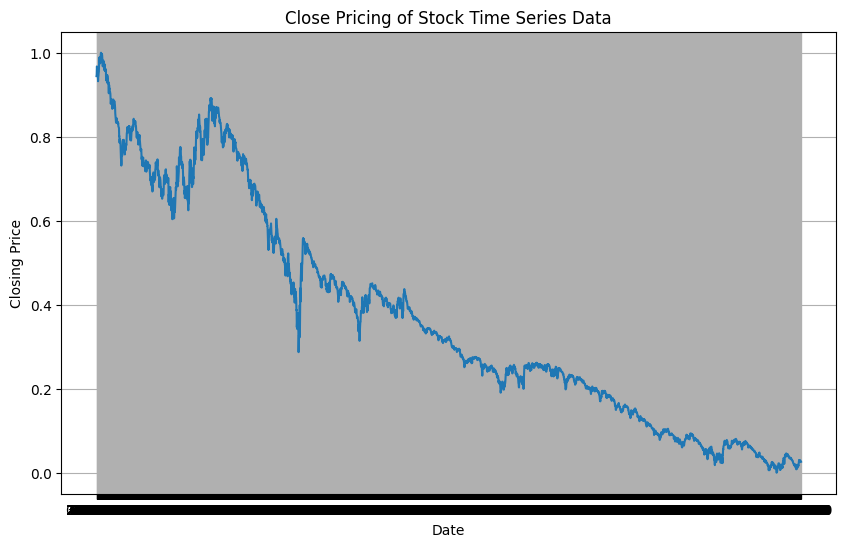

In [206]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close*'])
plt.title('Close Pricing of Stock Time Series Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

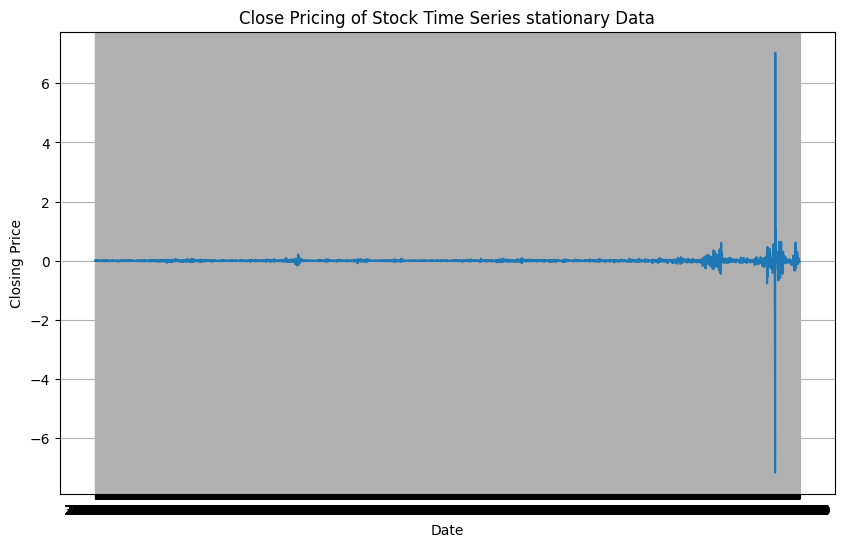

In [207]:
plt.figure(figsize=(10, 6))
plt.plot(data_stationary['Date'], data_stationary['Close*'])
plt.title('Close Pricing of Stock Time Series stationary Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

ARIMA

ADF Statistic: -14.468502670196525
p-value: 6.665272619068639e-27
Critical Values:
   1%: -3.432180489957965
   5%: -2.8623488076835053
   10%: -2.56720054146413


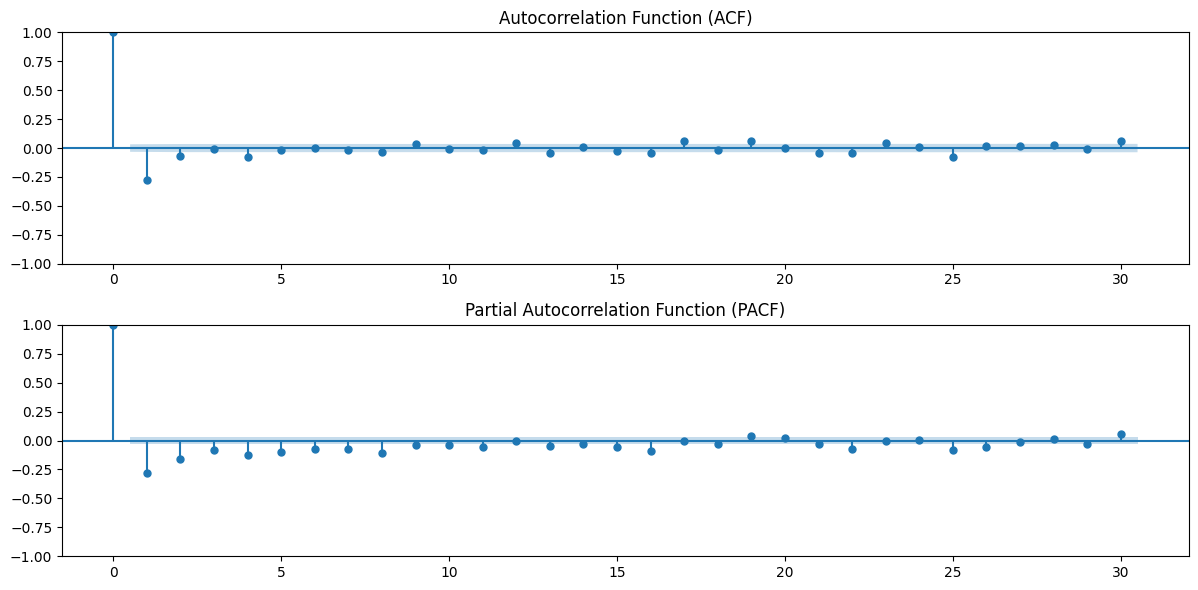

In [208]:
# Define a function to perform the ADF test
def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Perform ADF test to determine order of differencing
adf_test(data_stationary['Close*'])

# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data_stationary['Close*'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.subplot(212)
plot_pacf(data_stationary['Close*'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [209]:
# Example values for p, d, and q
p_values = range(0, 3)  # Try values from 0 to 2
d_values = range(0, 2)  # Try values 0 and 1
q_values = range(0, 3)  # Try values from 0 to 2

best_aic = np.inf
best_pdq = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(data_stationary['Close*'], order=(p, d, q))
                results = model.fit()
                aic = results.aic
                if aic < best_aic:
                    best_aic = aic
                    best_pdq = (p, d, q)
            except:
                continue

print("Best AIC:", best_aic)
print("Best (p, d, q):", best_pdq)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\st

Best AIC: -2710.5241727698876
Best (p, d, q): (1, 0, 2)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Pytho

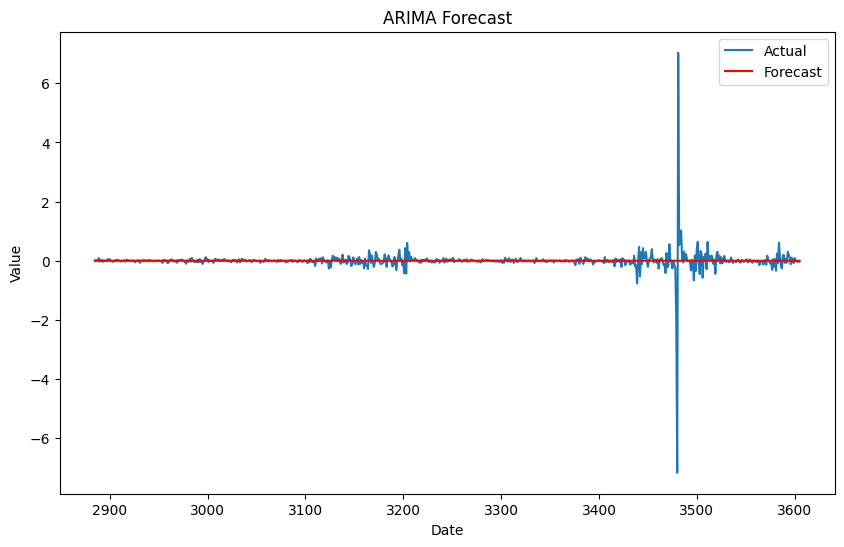

Mean Absolute Error (MAE): 0.09167122964067481
Mean Squared Error (MSE): 0.1624056590454865
Root Mean Squared Error (RMSE): 0.40299585487382683


In [210]:
# Split the data into features (X) and target variable (y)
from sklearn.metrics import mean_absolute_error


X = data_stationary.drop(columns=['Close*']) 
y = data_stationary['Close*']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit ARIMA model
order = (1, 0, 2)
model = ARIMA(y_train, order=order)
fit_model = model.fit()

# Forecast
forecast = fit_model.forecast(steps=len(y_test))

# Plot the actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

SARIMA

ADF Statistic for seasonal differencing: -22.43792309012689
p-value for seasonal differencing: 0.0


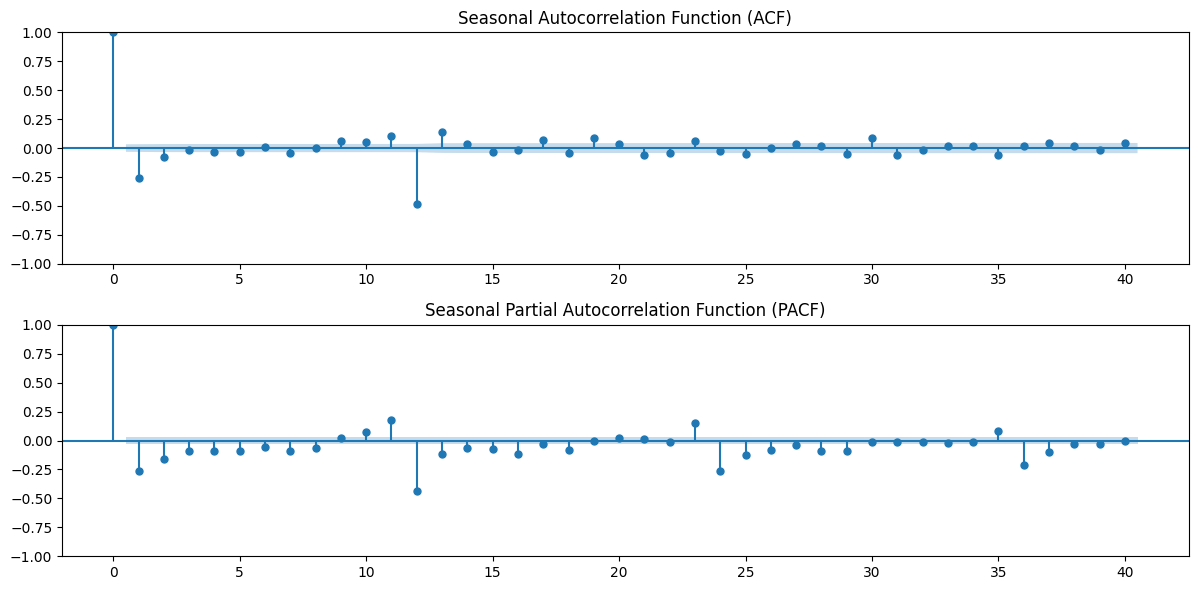

In [211]:
import itertools  

seasonal_diff = data_stationary['Close*'].diff(periods=12).dropna()
#Determine seasonal order of differencing (D) using ADF test
result = adfuller(seasonal_diff)
print('ADF Statistic for seasonal differencing:', result[0])
print('p-value for seasonal differencing:', result[1])

# Plot seasonal ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(seasonal_diff, ax=plt.gca(), lags=40)
plt.title('Seasonal Autocorrelation Function (ACF)')
plt.subplot(212)
plot_pacf(seasonal_diff, ax=plt.gca(), lags=40)
plt.title('Seasonal Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()



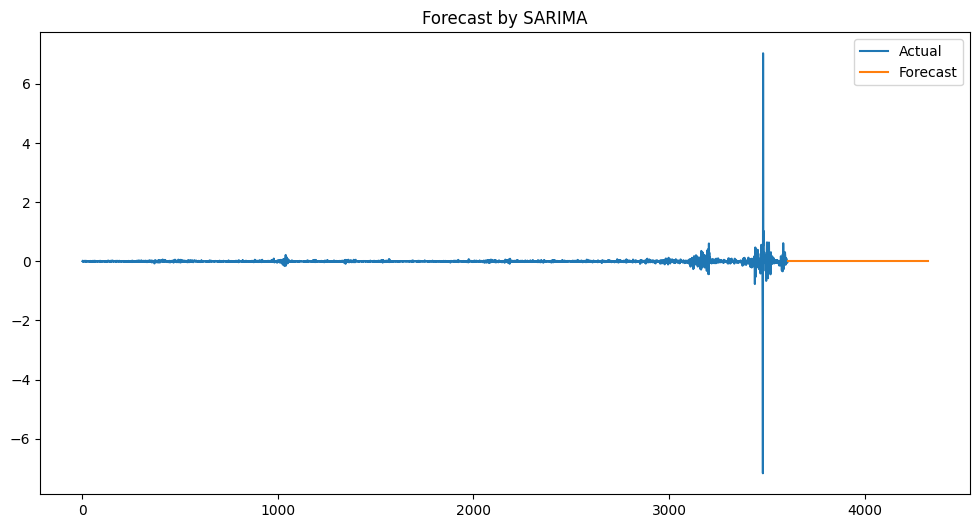

Mean Squared Error: 0.16285876203598507


In [230]:
model = SARIMAX(df['Close*'], order=(0, 0, 0), seasonal_order=(0, 0, 0, 12))
results = model.fit()

# Forecast
# Forecast
forecast = results.get_forecast(steps=len(y_test))  # Adjust the forecast length as needed

# Plot forecast
plt.figure(figsize=(12, 6))
plt.title("Forecast by SARIMA")
plt.plot(data_stationary['Close*'], label='Actual')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.legend()
plt.show()

#Evaluate model accuracy
actual_values = data_stationary['Close*'][-len(forecast.predicted_mean):]
mse = mean_squared_error(actual_values, forecast.predicted_mean)
print("Mean Squared Error:", mse) 


ANN

In [213]:
# Convert X_train to DataFrame
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)


# Convert non-numeric values to numeric
X_train_numeric = X_train_df.apply(pd.to_numeric, errors='coerce')
X_test_numeric = X_test_df.apply(pd.to_numeric, errors='coerce')


# Check the data type of X_train_numeric
print("X_train_numeric data type:", X_train_numeric.dtypes)
print("X_train_numeric data type:", X_test_numeric.dtypes)

X_train_numeric data type: Date           float64
Open           float64
High           float64
Low            float64
Adj Close**    float64
Volume         float64
dtype: object
X_train_numeric data type: Date           float64
Open           float64
High           float64
Low            float64
Adj Close**    float64
Volume         float64
dtype: object


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0591 - val_loss: 0.0791
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0970
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 0.1582
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - val_loss: 0.1314
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.1839
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101 - val_loss: 0.0724
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 - val_loss: 0.2724
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0492 - val_loss: 0.1155
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.1352
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.2052
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213     
Test Loss: 0.026267871260643005
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


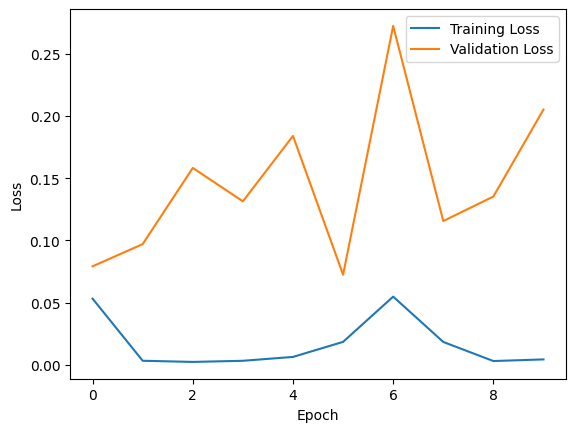

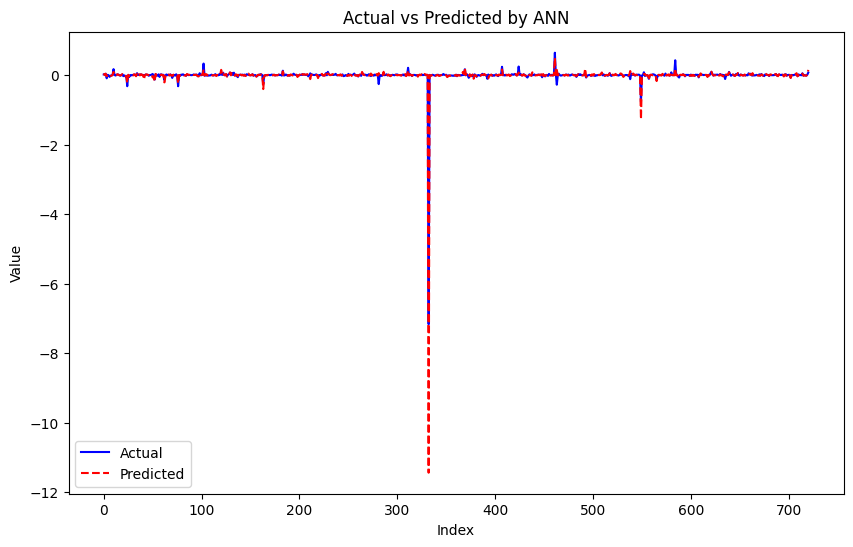

In [243]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv("data_stationary.csv")

# Separate features and target variable
X = data.drop(columns=["Date", "Close*", "Adj Close**"])  # Exclude non-predictive columns
y = data["Close*"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test_scaled)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted by ANN')
plt.legend()
plt.show()


ETS

In [215]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Simple Exponential Smoothing
model_simple = SimpleExpSmoothing(data_stationary['Close*']).fit()
forecast_simple = model_simple.forecast(10)  # Forecast next 10 time steps

# Double Exponential Smoothing
model_double = ExponentialSmoothing(data_stationary['Close*'], trend='add').fit()
forecast_double = model_double.forecast(10)  # Forecast next 10 time steps

# Triple Exponential Smoothing
model_triple = ExponentialSmoothing(data_stationary['Close*'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_triple = model_triple.forecast(10)  # Forecast next 10 time steps




c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._i

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


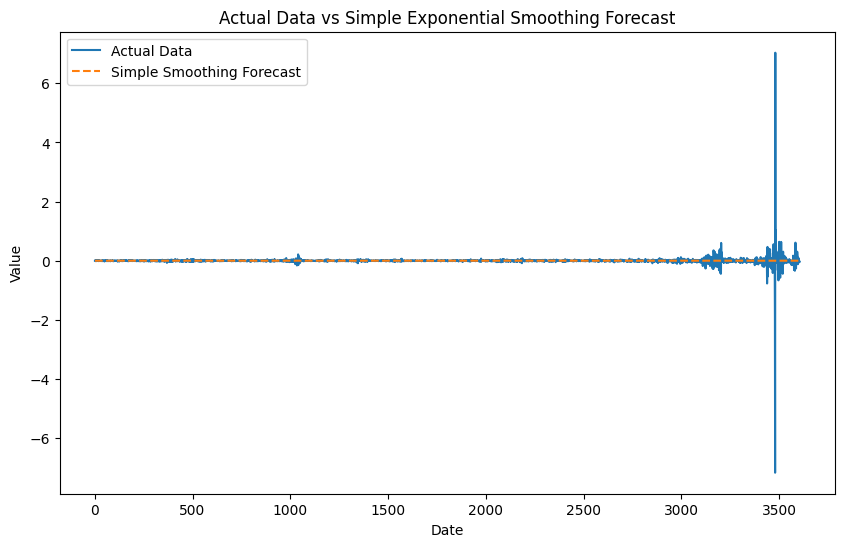

In [216]:


# Simple Exponential Smoothing
model_simple = SimpleExpSmoothing(data_stationary['Close*']).fit()
forecast_simple = model_simple.forecast(len(data_stationary))  # Forecast for the entire time series

# Plotting actual data vs Simple Exponential Smoothing forecast
plt.figure(figsize=(10, 6))
plt.plot(data_stationary.index, data_stationary['Close*'], label='Actual Data')
plt.plot(data_stationary.index, forecast_simple, label='Simple Smoothing Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual Data vs Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


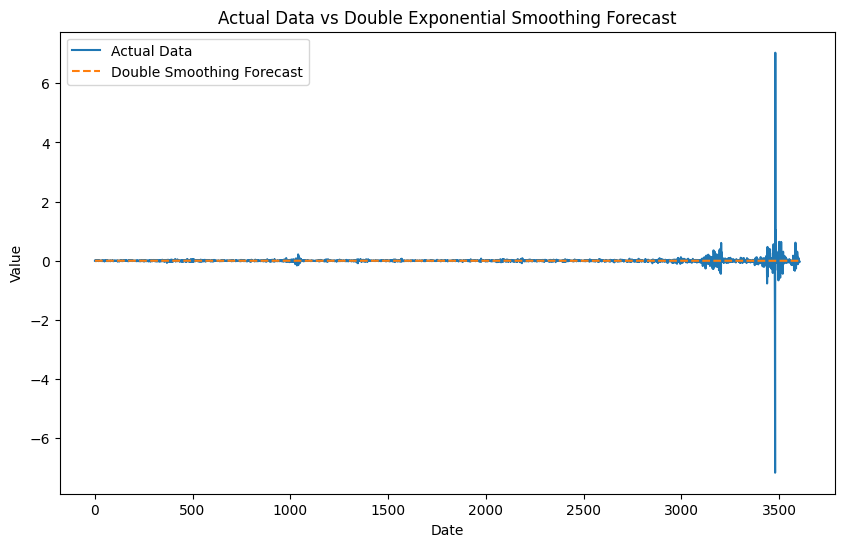

Accuracy Metrics for Double Exponential Smoothing:
MAE: 0.027850495779247808
MSE: 0.03274799840226947
RMSE: 0.1809640804200366
MAPE: inf


In [217]:
# Double Exponential Smoothing
model_double = ExponentialSmoothing(data_stationary['Close*'], trend='add').fit()
forecast_double = model_double.fittedvalues  # Forecast for the entire time series

# Plotting actual data vs Double Exponential Smoothing forecast
plt.figure(figsize=(10, 6))
plt.plot(data_stationary.index, data_stationary['Close*'], label='Actual Data')
plt.plot(data_stationary.index, forecast_double, label='Double Smoothing Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual Data vs Double Exponential Smoothing Forecast')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(data_stationary['Close*'], forecast_double)

# Calculate Mean Squared Error (MSE)
mse_double = mean_squared_error(data_stationary['Close*'], forecast_double)

# Calculate Root Mean Squared Error (RMSE)
rmse_double = np.sqrt(mse_double)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_double = mean_absolute_percentage_error(data_stationary['Close*'], forecast_double)

print("Accuracy Metrics for Double Exponential Smoothing:")
print("MAE:", mae_double)
print("MSE:", mse_double)
print("RMSE:", rmse_double)
print("MAPE:", mape_double)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


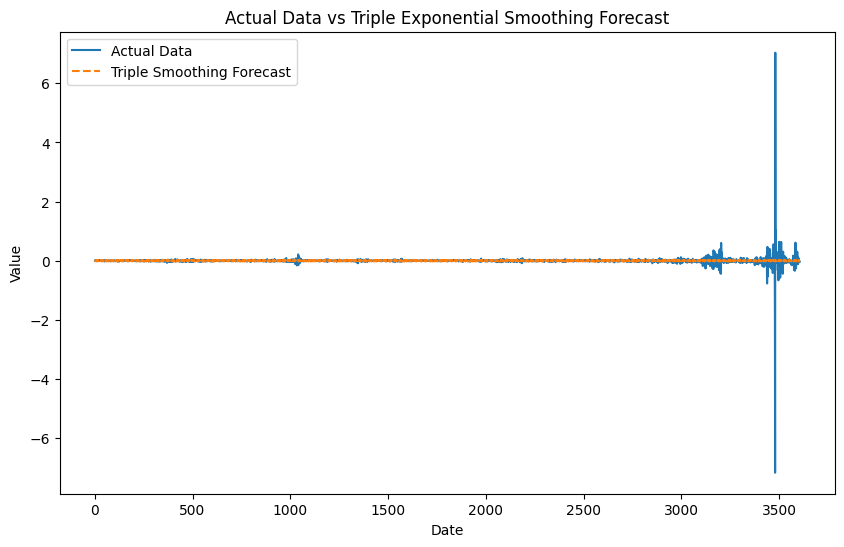

Accuracy Metrics for Triple Exponential Smoothing:
MAE: 0.03026714214925682
MSE: 0.03263674378223606
RMSE: 0.18065642469127985
MAPE: inf


In [218]:
# Triple Exponential Smoothing
model_triple = ExponentialSmoothing(data_stationary['Close*'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_triple = model_triple.fittedvalues  # Forecast for the entire time series

# Plotting actual data vs Triple Exponential Smoothing forecast
plt.figure(figsize=(10, 6))
plt.plot(data_stationary.index, data_stationary['Close*'], label='Actual Data')
plt.plot(data_stationary.index, forecast_triple, label='Triple Smoothing Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual Data vs Triple Exponential Smoothing Forecast')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(data_stationary['Close*'], forecast_triple)

# Calculate Mean Squared Error (MSE)
mse_triple = mean_squared_error(data_stationary['Close*'], forecast_triple)

# Calculate Root Mean Squared Error (RMSE)
rmse_triple = np.sqrt(mse_triple)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_triple = mean_absolute_percentage_error(data_stationary['Close*'], forecast_triple)

print("Accuracy Metrics for Triple Exponential Smoothing:")
print("MAE:", mae_triple)
print("MSE:", mse_triple)
print("RMSE:", rmse_triple)
print("MAPE:", mape_triple)


SVR

In [219]:
print(X_train)

          Date      Open      High       Low  Adj Close**    Volume
1     30-04-24  0.018509  0.003614  0.005447     0.004320  0.318725
2     29-04-24  0.002536  0.003100  0.013167     0.019856  0.252528
3     26-04-24 -0.007240 -0.002171 -0.003811    -0.003968  0.268862
4     25-04-24 -0.016094 -0.014031 -0.020533    -0.012721  0.305755
5     24-04-24  0.016146  0.007853  0.014082     0.005749  0.274345
...        ...       ...       ...       ...          ...       ...
2880  19-11-12 -0.077968 -0.008104 -0.048003    -0.002522  0.244954
2881  16-11-12 -0.019820 -0.072827 -0.048527    -0.077032  0.314914
2882  15-11-12  0.006274 -0.004294  0.014039    -0.019610  0.302713
2883  14-11-12  0.057014  0.057836  0.013113     0.006509  0.321544
2884  13-11-12  0.015414  0.024694  0.053825     0.055617  0.253372

[2884 rows x 6 columns]


In [220]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame containing the dataset with the date column
# Preprocess the date column
data_stationary['Date'] = pd.to_datetime(data_stationary['Date'])
data_stationary['year'] = data_stationary['Date'].dt.year
data_stationary['month'] = data_stationary['Date'].dt.month
# Add more features as needed

# Drop the original date column
data_stationary.drop(columns=['Date'], inplace=True)

# Split the data into features (X) and target variable (y)
X = data_stationary.drop(columns=['Close*'])  # Assuming 'target_column' is the name of your target column
y = data_stationary['Close*']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# Define the SVR regressor
svr = SVR()

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the model with best parameters on test data
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)




C:\Users\HP\AppData\Local\Temp\ipykernel_1720\794367549.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_stationary['Date'] = pd.to_datetime(data_stationary['Date'])


Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'poly'}
Mean Squared Error on test set: 0.07230637848229332


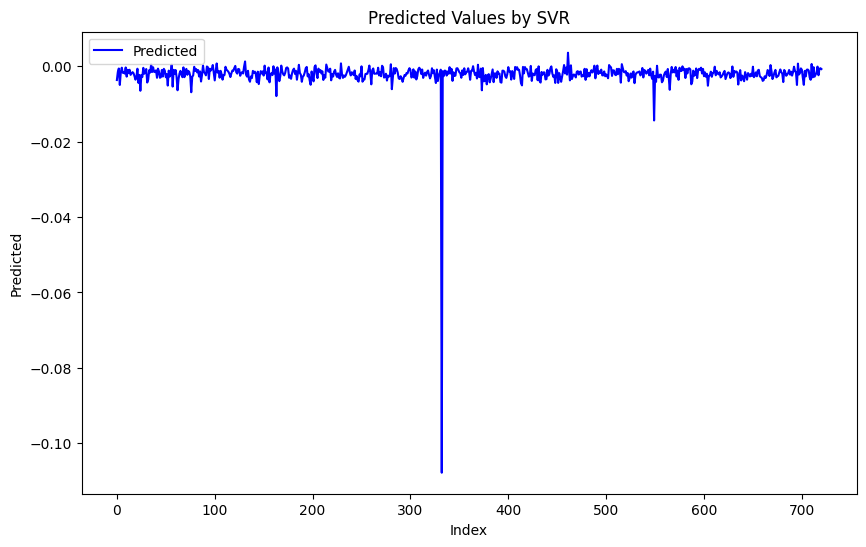

In [221]:
# Create index values for the predicted values
index_values = np.arange(len(y_pred))

# Plot predicted values
plt.figure(figsize=(10, 6))
plt.plot(index_values, y_pred, color='blue', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Predicted')
plt.title('Predicted Values by SVR')
plt.legend()
plt.show()

Prophet

C:\Users\HP\AppData\Local\Temp\ipykernel_1720\3620873082.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ds'] = pd.to_datetime(data['Date'])
20:57:20 - cmdstanpy - INFO - Chain [1] start processing
20:57:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containin

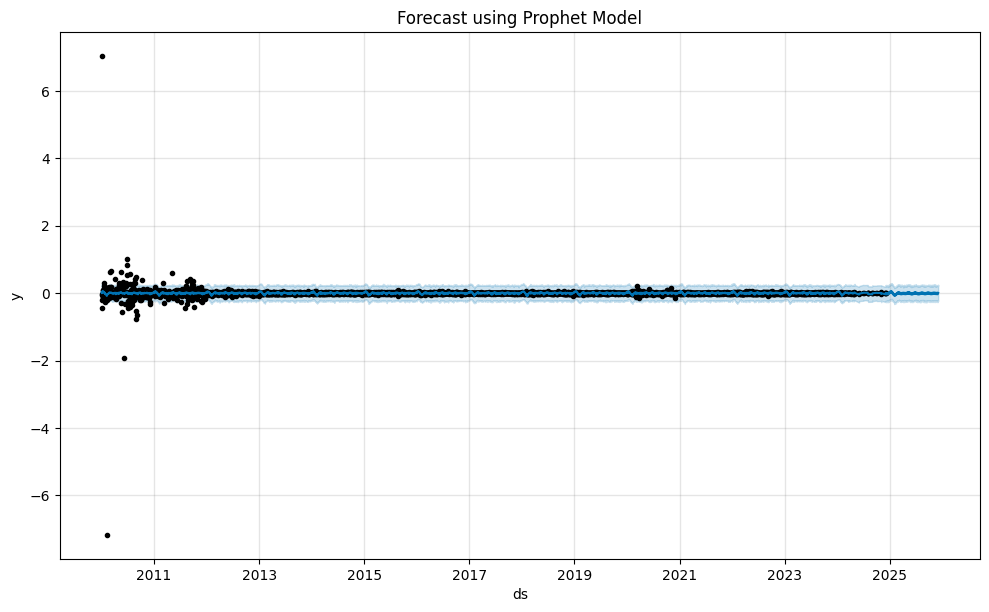

In [222]:
# Load the data
data = pd.read_csv("data_stationary.csv")

# Convert 'Date' column to datetime
data['ds'] = pd.to_datetime(data['Date'])

# Rename 'Close*' column to 'y' as required by Prophet
data['y'] = data['Close*']

# Select only the required columns
data = data[['ds', 'y']]

# Instantiate Prophet model
ProphetModel = Prophet()

# Fit the model
ProphetModel.fit(data)

# Make future predictions
future = ProphetModel.make_future_dataframe(periods=365)
forecast = ProphetModel.predict(future)

# Visualize the forecast
fig = ProphetModel.plot(forecast)
plt.title("Forecast using Prophet Model")
plt.show()

LSTM

Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0440 - val_loss: 0.1752
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0353 - val_loss: 0.1759
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0136 - val_loss: 0.1767
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0080 - val_loss: 0.1796
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1018 - val_loss: 0.1758
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0112 - val_loss: 0.1751
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0366 - val_loss: 0.1754
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0156 - val_loss: 0.1756
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - val_loss: 0.1803
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0190 - val_loss: 0.1754
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 
Test Loss: 0.0037842574529349804
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


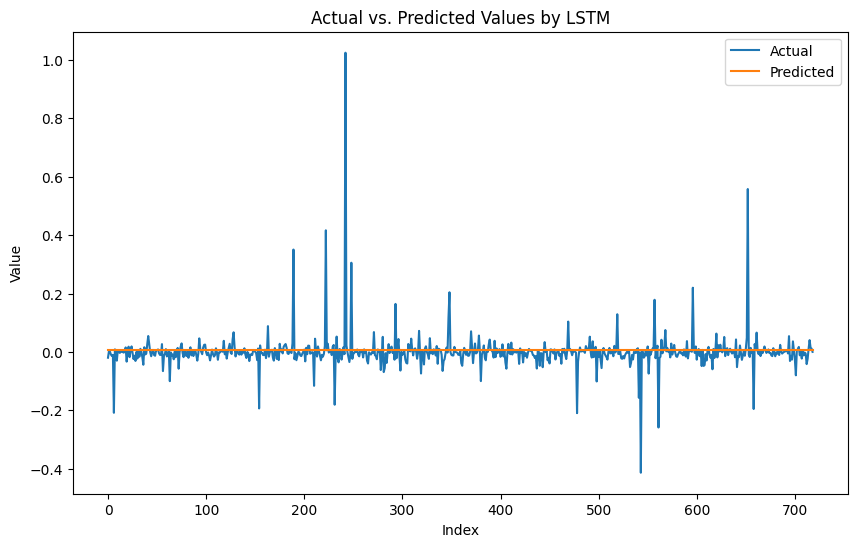

In [223]:
# Split the data into features (X) and target variable (y)
X = data_stationary.drop(columns=['Close*'])  # Assuming 'target_column' is the name of your target column
y = data_stationary['Close*']

# Convert data into sequences
sequence_length = 10  # Choose an appropriate sequence length
X_seq = []
y_seq = []
for i in range(len(X) - sequence_length):
    X_seq.append(X[i:i+sequence_length])
    y_seq.append(y[i+sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)
# Convert input data to float32
X_seq = X_seq.astype(np.float32)
y_seq = y_seq.astype(np.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Design LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
# Predictions on test data
predictions = model.predict(X_test)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted Values by LSTM')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

HYBRID

C:\Users\HP\AppData\Local\Temp\ipykernel_1720\1625120404.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

Best ARIMA Order: (0, 0, 0)
Best MAPE: 1.0429932736239973
Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.0232e-04 - val_loss: 0.0090
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9530e-04 - val_loss: 0.0088
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7376e-04 - val_loss: 0.0088
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4171e-04 - val_loss: 0.0088
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0603e-04 - val_loss: 0.0088
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9805e-04 - val_loss: 0.0087
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7695e-04 - val_loss: 0.0088
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6669e-04 - val_loss: 0.0088
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4427e-04 - val_loss: 0.0088
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3174e-04 - val_loss: 0.0088
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0120e-04 - val_loss: 0.0089
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

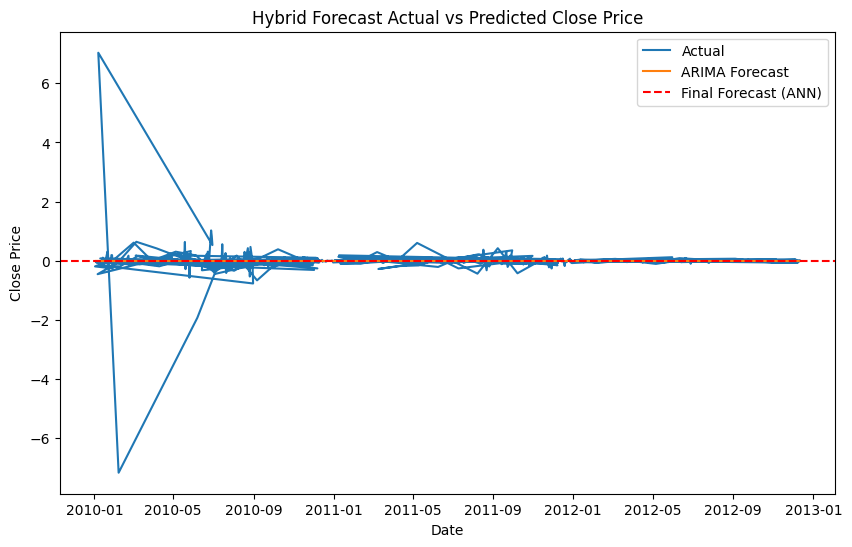

In [273]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('data_stationary.csv')

# Ensure Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Optimize ARIMA Order
best_mape = np.inf
best_order = None
for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                arima_order = (p, d, q)
                arima_model = ARIMA(train['Close*'], order=arima_order)
                arima_result = arima_model.fit()
                arima_forecast = arima_result.forecast(steps=len(test))

                # Calculate MAPE
                mape = mean_absolute_percentage_error(test['Close*'], arima_forecast)

                if mape < best_mape:
                    best_mape = mape
                    best_order = arima_order

            except:
                continue

print("Best ARIMA Order:", best_order)
print("Best MAPE:", best_mape)

# Fit ARIMA model with best order
arima_model = ARIMA(train['Close*'], order=best_order)
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

# Extract residuals
arima_residuals = test['Close*'].values - arima_forecast.values

# Normalize residuals
scaler = MinMaxScaler(feature_range=(-1, 1))
arima_residuals_normalized = scaler.fit_transform(arima_residuals.reshape(-1, 1))

# Define ANN model
model = Sequential()
model.add(Dense(20, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train ANN model
X_train = arima_residuals_normalized[:-1]
y_train = arima_residuals_normalized[1:]

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Make predictions
residuals_pred = model.predict(arima_residuals_normalized[-1].reshape(1, 1))
final_forecast_residual = arima_forecast.values[-1] + scaler.inverse_transform(residuals_pred)[0][0]

# Repeat the final forecast to match the length of test['Close*']
final_forecast = np.full_like(test['Close*'], final_forecast_residual)

# Calculate MAPE
mape = mean_absolute_percentage_error(test['Close*'], final_forecast)

# Calculate accuracy
accuracy = 100 - mape
accuracy = np.clip(accuracy, 0, 100)

print("Final MAPE:", mape)
print("Final Accuracy:", accuracy, "%")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test['Close*'], label='Actual')
plt.plot(test['Date'], arima_forecast, label='ARIMA Forecast')
plt.axhline(final_forecast[0], color='red', linestyle='--', label='Final Forecast (ANN)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Hybrid Forecast Actual vs Predicted Close Price')
plt.legend()
plt.show()


SQL COnnection

In [2]:
import pandas as pd
import mysql.connector

try:
    # Establish connection to MySQL database
    connection = mysql.connector.connect(
        host='localhost',
        port='3306',
        user='root',
        password='root',
        database='stocks'
    )
    cursor = connection.cursor()

    # Read the dataset from CSV file
    df = pd.read_csv('data_stationary.csv')

    # Iterate through the dataset and insert into the database
    for index, row in df.iterrows():
        # Extracting data from each row
        date = row['Date']
        open_price = row['Open']
        high_price = row['High']
        low_price = row['Low']
        close_price = row['Close*']
        adj_close = row['Adj Close**']
        volume = row['Volume']

        # Insert data into the table
        insert_query = """
                    INSERT INTO StocksData (Date, Open, High, Low, Close, AdjClose, Volume)
                    VALUES (%s, %s, %s, %s, %s, %s, %s)
                    """
        values = (date, open_price, high_price, low_price, close_price, adj_close, volume)
        cursor.execute(insert_query, values)

    # Commit the transaction
    connection.commit()

    print("Data inserted successfully!")

except mysql.connector.Error as error:
    print("Error inserting data into MySQL table:", error)

finally:
    # Close the cursor and connection
    cursor.close()
    connection.close()


Data inserted successfully!


C:\Users\HP\AppData\Local\Temp\ipykernel_512\785298560.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


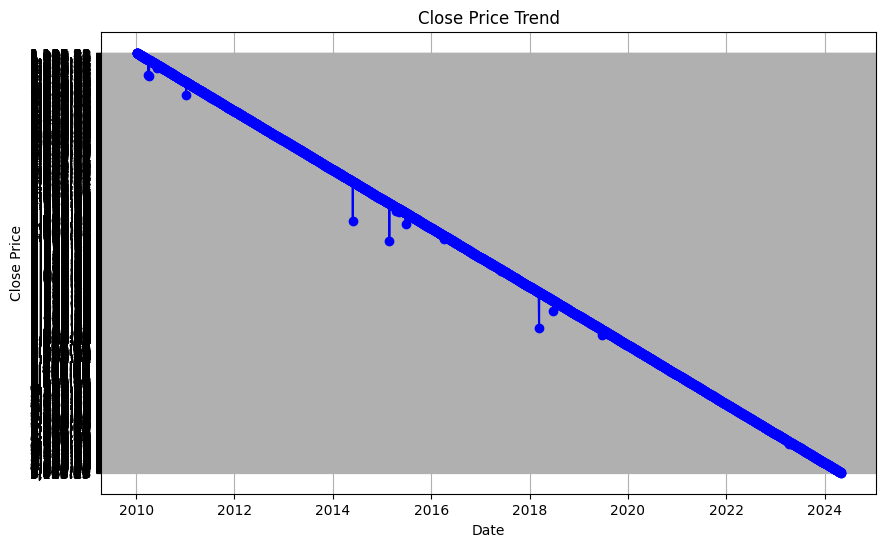

In [4]:
import matplotlib.pyplot as plt
df=pd.read_csv("S&P.csv")

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close*'], marker='o', color='blue', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Trend')
plt.grid(True)
plt.show()
